# Logistic Regression

For classification problem, we usually start with Logistic Regression.

It is often sufficient and produce decent result.

We will compare it to our Threshold Predictor and see if it perform better.

For recap, the threshold predictor result :
- F2 Score on Training Data: 0.6654767975522693
- F2 Score on Test Data: 0.7012195121951219
- Accuracy on Training Data: 0.924375
- Accuracy on Test Data: 0.928


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
X_train=pd.read_csv('data/X_train.csv')
y_train=pd.read_csv('data/y_train.csv')
X_test=pd.read_csv('data/X_test.csv')
y_test=pd.read_csv('data/y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('data/y_smote_train.csv')
X_train_over_omf = pd.read_csv('data/X_smote_train.csv')

X_train_reduced = X_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_test_reduced = X_test.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])

y_ros_train = pd.read_csv('data/y_ros_train.csv')
X_ros_train = pd.read_csv('data/X_ros_train.csv')
X_ros_train_reduced = X_ros_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])


y_mls_train = pd.read_csv('data/y_mls_train.csv')
X_mls_train = pd.read_csv('data/X_mls_train.csv')
X_mls_train_reduced = X_mls_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("Shape of X_train_over_reduced:", X_train_over_reduced.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_train_omf:", y_train_omf.shape)
print("Shape of y_test_omf:", y_test_omf.shape)
print("Shape of y_train_over_omf:", y_train_over_omf.shape)
print("Shape of X_train_over_omf:", X_train_over_omf.shape)
print("Shape of y_ros_train:", y_ros_train.shape)
print("Shape of X_ros_train:", X_ros_train.shape)

Shape of X_train: (8000, 9)
Shape of X_test: (2000, 9)
Shape of X_train_reduced: (8000, 6)
Shape of X_test_reduced: (2000, 6)
Shape of X_train_over_reduced: (15444, 6)
Shape of y_train: (8000, 6)
Shape of y_test: (2000, 6)
Shape of y_train_omf: (8000,)
Shape of y_test_omf: (2000,)
Shape of y_train_over_omf: (15444, 1)
Shape of X_train_over_omf: (15444, 9)
Shape of y_ros_train: (15228, 6)
Shape of X_ros_train: (15228, 9)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer


def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target='Machine failure'):
    y_train_omf = y_train[target]
    y_test_omf = y_test[target]
    f2_scorer = make_scorer(fbeta_score, beta=2)    
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_accuracy = cross_val_score(clf, X_train, y_train_omf, cv=stratified_cv, scoring='accuracy') # 5-fold cross-validation
    cv_f2 = cross_val_score(clf, X_train, y_train_omf, cv=stratified_cv, scoring=f2_scorer) # 5-fold cross-validation
    cv_accuracy_mean = cv_accuracy.mean()
    cv_f2_mean = cv_f2.mean()
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2)
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2)
    train_recall=recall_score(y_train_omf, y_train_pred_omf)
    test_recall=recall_score(y_test_omf, y_test_pred_omf)
    train_precision=precision_score(y_train_omf, y_train_pred_omf, zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf,  zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(15, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()



    print(" For `Machine failure` label:")
    print(predictor_name, " :")
    print(f"- CV F2 Score on Training Data: {cv_f2_mean}")
    print(f"- CV Accuracy on Training Data: {cv_accuracy_mean}")

    print(f"- F2 Score on Training Data: {f2_train}")
    print(f"- F2 Score on Test Data: {f2_test}")
    print(f"- Accuracy on Training Data: {train_accuracy}")
    print(f"- Accuracy on Test Data: {test_accuracy}")
    print(f"- Recall on Training Data: {train_recall}")
    print(f"- Recall on Test Data: {test_recall}")
    print(f"- Precision on Training Data: {train_precision}")
    print(f"- Precision on Test Data: {test_precision}")


## Logistic Regression On Imbalanced Data

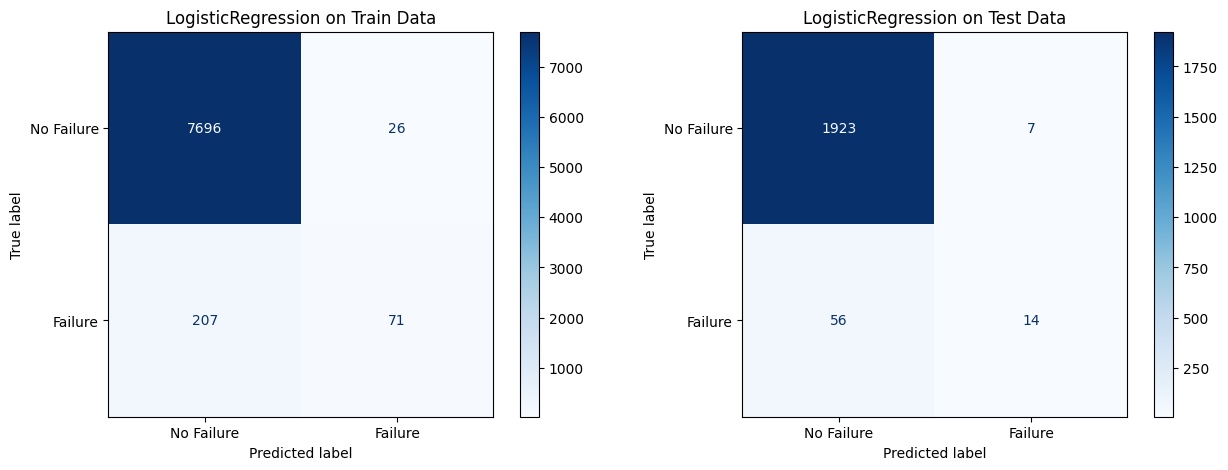

 For `Machine failure` label:
LogisticRegression  :
- CV F2 Score on Training Data: 0.28618544677811875
- CV Accuracy on Training Data: 0.970875
- F2 Score on Training Data: 0.293631100082713
- F2 Score on Test Data: 0.23255813953488372
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685
- Recall on Training Data: 0.25539568345323743
- Recall on Test Data: 0.2
- Precision on Training Data: 0.7319587628865979
- Precision on Test Data: 0.6666666666666666


In [8]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.6654767975522693
- F2 Score on Test Data: 0.7012195121951219
- Accuracy on Training Data: 0.924375
- Accuracy on Test Data: 0.928

LogisticRegression:
- F2 Score on Training Data: 0.293631100082713
- F2 Score on Test Data: 0.23255813953488372
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

In term of accuracy our logistic regression is much more accurate than Threshold Predictor but its F2 scores are worst

We don't use cross validation result:
- it does not show much difference than simple accuracy and f2
- it is hard to compare it with threshold predictor which does not yet support cross validation

This could be due to imbalanced dataset that we discovered during our preprocessing stage

## Logistic Regression on Balanced Data


Let's see if using SMOTE balanced dataset will improved our F2 and accuracy

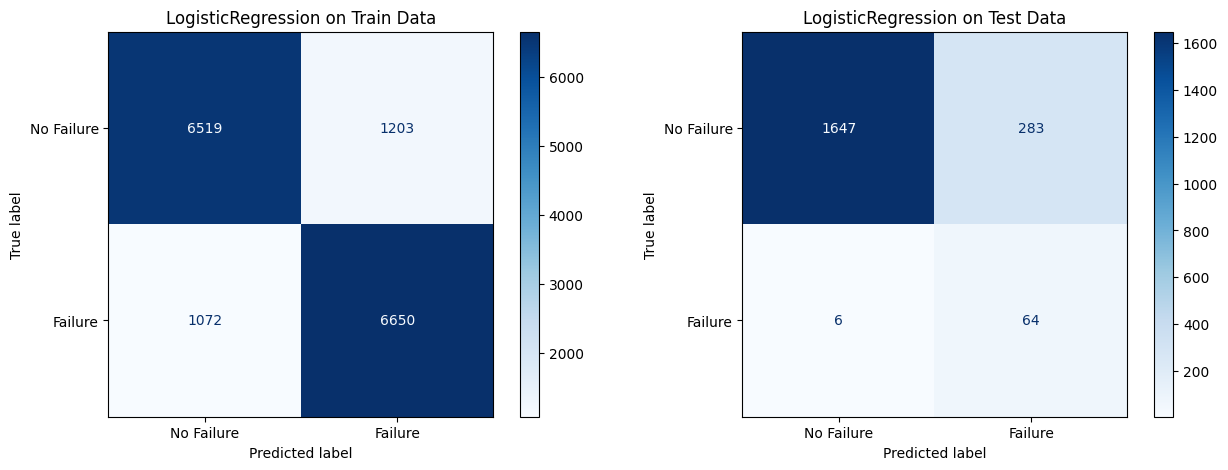

 For `Machine failure` label:
LogisticRegression  :
- CV F2 Score on Training Data: 0.858199590933204
- CV Accuracy on Training Data: 0.852758576731407
- F2 Score on Training Data: 0.8582638548307994
- F2 Score on Test Data: 0.5103668261562998
- Accuracy on Training Data: 0.8526936026936027
- Accuracy on Test Data: 0.8555
- Recall on Training Data: 0.8611758611758612
- Recall on Test Data: 0.9142857142857143
- Precision on Training Data: 0.846810136253661
- Precision on Test Data: 0.1844380403458213


In [9]:
clr = LogisticRegression(max_iter=1000, random_state=42)
#analyze_model_performance(clr, X_train=X_mls_train, y_train=y_mls_train, X_test=X_test, y_test=y_test)
analyze_model_performance(clr, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)

Also let's try on Random Over Sampled data

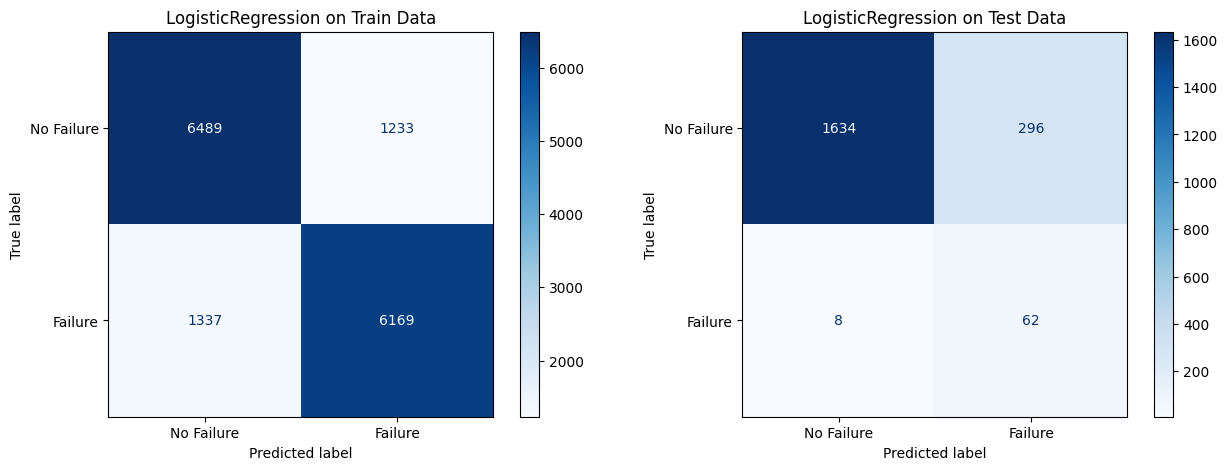

 For `Machine failure` label:
LogisticRegression  :
- CV F2 Score on Training Data: 0.8247299787633787
- CV Accuracy on Training Data: 0.8313628684204
- F2 Score on Training Data: 0.8241596750921819
- F2 Score on Test Data: 0.48589341692789967
- Accuracy on Training Data: 0.8312319411610192
- Accuracy on Test Data: 0.848
- Recall on Training Data: 0.8218758326671995
- Recall on Test Data: 0.8857142857142857
- Precision on Training Data: 0.8334233990813293
- Precision on Test Data: 0.17318435754189945


In [10]:
clr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
analyze_model_performance(clr, X_train=X_ros_train, y_train=y_ros_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.6654767975522693
- F2 Score on Test Data: 0.7012195121951219
- Accuracy on Training Data: 0.924375
- Accuracy on Test Data: 0.928

LogisticRegression:
- F2 Score on Training Data: 0.293631100082713
- F2 Score on Test Data: 0.23255813953488372
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

LogisticRegression on balanced SMOTE dataset
- F2 Score on Training Data: 0.8526746390243292
- F2 Score on Test Data: 0.6944771290708951
- Accuracy on Training Data: 0.8526936026936027
- Accuracy on Test Data: 0.8555

LogisticRegression on balanced ROS dataset
- F2 Score on Training Data: 0.8271891863012235
- F2 Score on Test Data: 0.48742138364779874
- Accuracy on Training Data: 0.8338586813764118
- Accuracy on Test Data: 0.849

Using balanced dataset where we have more failure data, reduce accuracy but improve our F2- scores

Our F2 scores have improved better than Threshold Predictor but not by much

## Logistic Regression on Reduced Features


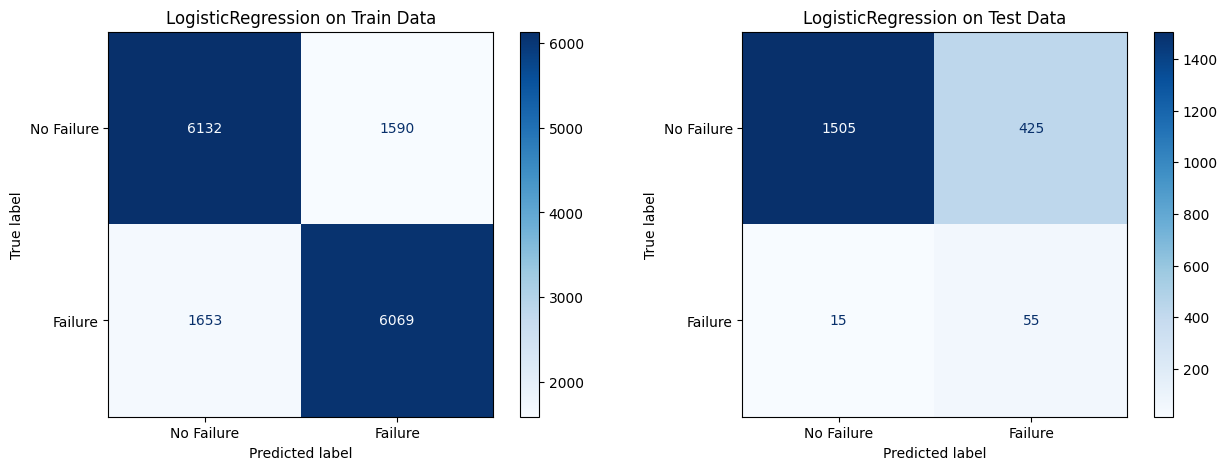

 For `Machine failure` label:
LogisticRegression  :
- CV F2 Score on Training Data: 0.787445076408217
- CV Accuracy on Training Data: 0.7902098495916481
- F2 Score on Training Data: 0.7872207953926376
- F2 Score on Test Data: 0.3618421052631579
- Accuracy on Training Data: 0.79001554001554
- Accuracy on Test Data: 0.78
- Recall on Training Data: 0.785936285936286
- Recall on Test Data: 0.7857142857142857
- Precision on Training Data: 0.7924010967489228
- Precision on Test Data: 0.11458333333333333


In [11]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train_over_reduced, y_train=y_train_over_omf, X_test=X_test_reduced, y_test=y_test)

Reducing the features produce much worse performance for our logistic regression.

# Checking Logistic Regression Assumptions

Like every model, Logistic regression is build upon some assumptions. 
Based on an [article](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290/) in towardsdatascience.com, there are 4 assumptions:
1. Appropriate Outcome Type
2. Independence of observations
3. Sufficiently large sample size
4. Linearity of Independent Variables and Log-odds
5. No strongly influential outliers
6. Absence of Multicollinearity

Some of those assumptions, we know to be true given our knowledge for our dataset:
- We have binary outcome type which is appropriate for our logistic regression
- Our sample size is 10000, our train size 8000 and oversample train size is 15444 which is sufficiently large
- Our data contains independent samples/observations

Hence we just need to check for the following assumptions:
- Linearity of Independent Variables and Log-odds
- No strongly influential outliers
- Absence of Multicollinearity

Given our insight from building Threshold based predictor, we will focus on checking linearity assumption

We will borrow ideas from https://github.com/kennethleungty/Logistic-Regression-Assumptions/blob/main/Logistic_Regression_Assumptions.ipynb to perform our tests

## Linearity of Independent Variables and Log-odds

In order to check linearity we will use statsmodels library.

This assumption means that relationships between the features and the logit (log odds) is linear.


In [12]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


We will perform Box-Tidwell Transformation Test to verify linearity

reference [wikipedia on Box-Tidwell Transformation](https://en.wikipedia.org/wiki/Power_transform#Box-Tidwell_transformation) 

In [13]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
y_train_omf = y_train['Machine failure']
model = GLM(y_train_omf, X_train, family=families.Binomial())
logit_results = model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Machine failure   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7992
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -762.61
Date:                Thu, 14 Aug 2025   Deviance:                       1525.2
Time:                        15:56:59   Pearson chi2:                 9.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1052
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Type                

For the output above, we look for any values of P that is < 0.001 which is statistically significant
Here we see that P for the following is less than 0.001 which indicates non-linearity:
- Air temperature (K)
- Process temperature (K)
- Rotational speed (rpm)
- Torque (Nm)
- Power (W)
- Temperature Difference (K)
- Temperature Rotation (rpmK)


This fit what we learned when we tried to create Threshold based Predictor/Classifier
- HDF Fail if Rotational Speed (rpm) <= 1379 and Temperature Difference <=8.599999999999966
- PWF fail if Power (W) <= 3521.78819652723 or Power (W) >= 8998.024014705741

While P for the following features > 0.001 which indicates linearity
- Type
- Tool wear (min) 
- Strain (minNm)

This also fit what we learned when we tried to create Threshold based Predictor/Classifier
- TWF fail if Tool Wear (Min) > 198
- OSF fail if Strain (minNm) >= 110003.2

We are dealing with non-linearity as such, Logistic Regression will not work very well

# Conclusion

Logistic Regression does not work well with imbalanced dataset and non-linear features

It is also worse than Threshold Predictor in term of False Positive and introduce more unnecessary down time